<a href="https://colab.research.google.com/github/tajrink/spam_detection/blob/main/spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###library

In [ ]:
#import libraries
import pandas as pd
import numpy as np
# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


from sklearn.feature_extraction.text import TfidfVectorizer
# Importing essential libraries for data preprocessing and nlp
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
st = PorterStemmer ()
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,classification_report
from sklearn.model_selection import GridSearchCV
#import library for model
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
#load data
df=pd.read_csv("https://raw.githubusercontent.com/tajrink/spam_detection/main/lingSpam.csv")

###Initial Analysis 

In [ ]:
df.head()

,Unnamed: 0,Body,Label
0,0,Subject: great part-time or summer job !\n \n ...,1
1,1,Subject: auto insurance rates too high ?\n \n ...,1
2,2,Subject: do want the best and economical hunti...,1
3,3,Subject: email 57 million people for $ 99\n \n...,1
4,4,Subject: do n't miss these !\n \n attention ! ...,1


In [ ]:
df.shape

(2605, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2605 entries, 0 to 2604
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2605 non-null   int64 
 1   Body        2605 non-null   object
 2   Label       2605 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.2+ KB


In [ ]:
df.isnull().sum()

Unnamed: 0    0
Body          0
Label         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

    1. Data contains 2605 rows and 3 columns 
    2. It has 1 string/object column, and one categorical column in int 
    3. There are no null and duplicate values present within data 

### Feature Engeering

In [ ]:
# dropping redudant column
df.drop(['Unnamed: 0'],axis=1, inplace=True)

In [ ]:
df.shape

(2605, 2)

###EDA


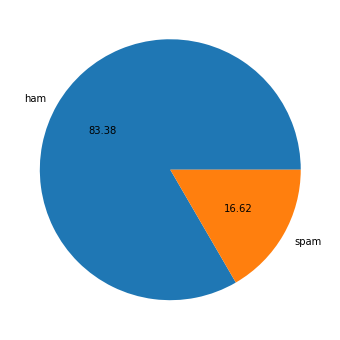

In [ ]:
# Let's see the distribution of target variable
#Email distribution
plt.figure(figsize=(12,6))
plt.pie(df['Label'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

###Text preprocessing


In [ ]:
#lower case
df['clean']= df["Body"].apply(lambda x: str(x).lower()) 

In [ ]:
#remove tab and new line
df['clean'] =df['clean'].apply(lambda x: re.sub('[\n|\t]',' ',str(x)))

In [ ]:
#remove the word subject
df['clean'] =df['clean'].apply(lambda x: re.sub('subject:',' ',str(x)))

In [ ]:
#remove link
df['clean'] =df['clean'].apply(lambda x:re.sub(r"http\S+", "", str(x)))

In [ ]:
#remove special character
df['clean']= df["clean"].apply(lambda x: re.sub(r"""[^\w\s]+""",' ', str(x)))

In [ ]:
#Remove numbers or alphanumerical characters from the dataset
df['clean']= df["clean"].apply(lambda x: re.sub('[^A-Za-z]+' + ' ', ' ', str(x))) 

In [ ]:
#split/tokenize
df['clean_tk']= df["clean"].apply(lambda x : x.split()) 

In [ ]:
stopwords = nltk.corpus.stopwords.words("english")

In [ ]:
#lemmatize
#we'll use NLTK's WordNet Lemmatizer. WordNet is a big dictionary.

df['clean']=df['clean_tk'].apply(lambda x : ' '.join([lemmatizer.lemmatize(elem) for elem in x if len(elem)>2 not in stopwords]))

In [ ]:
df

,Body,Label,clean,clean_tk
0,Subject: great part-time or summer job !\n \n ...,1,great part time summer job have display box wi...,"[great, part, time, or, summer, job, we, have,..."
1,Subject: auto insurance rates too high ?\n \n ...,1,auto insurance rate too high dear nlpeople sur...,"[auto, insurance, rates, too, high, dear, nlpe..."
2,Subject: do want the best and economical hunti...,1,want the best and economical hunting vacation ...,"[do, want, the, best, and, economical, hunting..."
3,Subject: email 57 million people for $ 99\n \n...,1,email million people for million email address...,"[email, million, people, for, million, email, ..."
4,Subject: do n't miss these !\n \n attention ! ...,1,miss these attention warning adult only warnin...,"[do, n, t, miss, these, attention, warning, ad..."
...,...,...,...,...
2600,Subject: computationally - intensive methods i...,0,computationally intensive method quantitative ...,"[computationally, intensive, methods, in, quan..."
2601,Subject: books : a survey of american linguist...,0,book survey american linguistics the publishin...,"[books, a, survey, of, american, linguistics, ..."
2602,Subject: wecol ' 98 - - western conference on ...,0,wecol western conference linguistics arizona s...,"[wecol, western, conference, on, linguistics, ..."
2603,Subject: euralex ' 98 - revised programme\n \n...,0,euralex revised programme euralex liege belgiu...,"[euralex, revised, programme, euralex, liege, ..."


###EDA
Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

In [ ]:
# setting specs of word cloud image
wc = WordCloud(width=1000, height=500, min_font_size=10, background_color='white')

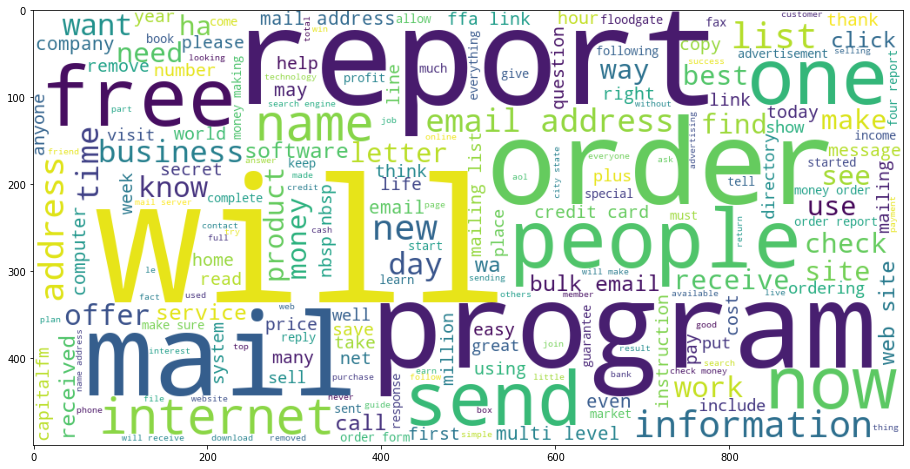

In [ ]:
# creating word cloud of spam emails
spam_wc = wc.generate(df[df['Label'] == 1]['clean'].str.cat(sep=' '))

plt.figure(figsize=(20,8))
plt.imshow(spam_wc)

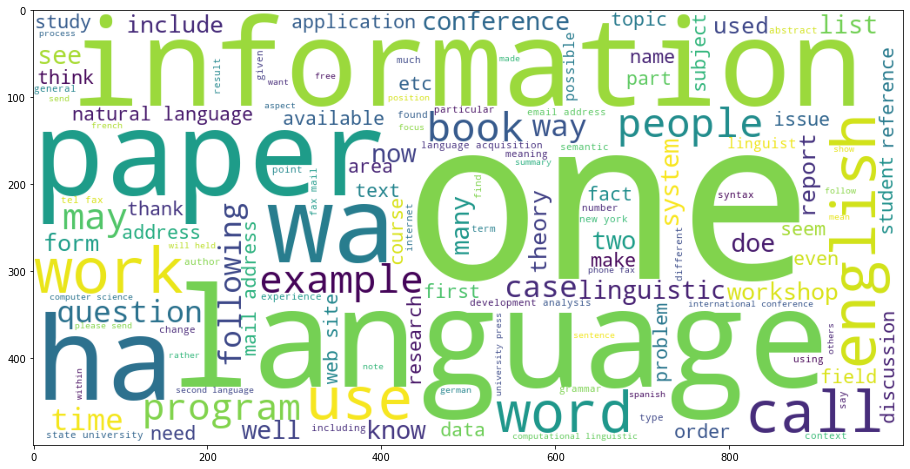

In [ ]:
# creating word cloud of ham emails
ham_wc = wc.generate(df[df['Label'] == 0]['clean'].str.cat(sep=' '))

plt.figure(figsize=(20,8))
plt.imshow(ham_wc)

### Train test split


TF-IDF stands for Term Frequency Inverse Document Frequency of records. It can be defined as the calculation of how relevant a word in a series or corpus is to a text. The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word frequency in the corpus (data-set).

Tf-idf is one of the best metrics to determine how significant a term is to a text in a series or a corpus. tf-idf is a weighting system that assigns a 
weight to each word in a document based on its term frequency (tf) and the reciprocal document frequency (tf) (idf). The words with higher scores of weight are deemed to be more significant.

In [ ]:
#tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=100)


In [ ]:
# Setting up features and target as x and y
X = vectorizer.fit_transform(df["clean"]).toarray()
y = df['Label'].values

In [ ]:
# Splitting the testing and training sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

###Model Selection




In [ ]:
#model
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=0)
xgb = XGBClassifier(n_estimators=50,random_state=0)


In [ ]:
classifiers = {
    'GaussianNB' : gnb,
    'MultinomialNB' : mnb,
    'BernoulliNB' : bnb,
    'SVC' : svc,
    'KNeighbors' : knc, 
    'DecisionTree': dtc, 
    'LogisticRegression': lrc, 
    'RandomForest': rfc, 
    'XGB': xgb
  }

In [ ]:
# creating a function to train list of algorithms and give accuracy , precision score
def train_classifier(classifiers,x_train,y_train,x_test,y_test):
    
    classifiers.fit(x_train,y_train)
    
    y_pred = classifiers.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    
    return accuracy,f1

In [ ]:
# storing  in list
accuracy_scores = []
f1_scores=[]

# training all the models on training data
for name,classifiers in classifiers.items():
    
    current_accuracy,current_f1 = train_classifier(classifiers, X_train,y_train,X_test,y_test)
          
    accuracy_scores.append(current_accuracy)
    
    f1_scores.append(current_f1)
    

In [ ]:
classifiers = {
    'GaussianNB' : gnb,
    'MultinomialNB' : mnb,
    'BernoulliNB' : bnb,
    'SVC' : svc,
    'KNeighbors' : knc, 
    'DecisionTree': dtc, 
    'LogisticRegression': lrc, 
    'RandomForest': rfc, 
    'XGB': xgb
  }

In [ ]:
performance = pd.DataFrame({'Algorithm': classifiers.keys(),'Accuracy':accuracy_scores,'F1_score':f1_scores}).sort_values('F1_score',ascending=False)
performance

,Algorithm,Accuracy,F1_score
3,SVC,0.983376,0.945148
8,XGB,0.980818,0.935622
7,RandomForest,0.980818,0.933921
4,KNeighbors,0.979540,0.932773
6,LogisticRegression,0.979540,0.931034
1,MultinomialNB,0.978261,0.921659
5,DecisionTree,0.970588,0.901288
2,BernoulliNB,0.962916,0.873362
0,GaussianNB,0.936061,0.812030


###Hyperparameter

In [ ]:
#grid search for hyperparameter

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_estimator_)
print(grid.score(X_test,y_test))
grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.970 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.970 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.975 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.981 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.964 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.852 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.844 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.849 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.843 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.827 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [ ]:
rf = RandomForestClassifier()
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }
grid = GridSearchCV(rf,param_grid=grid_space,cv=3,scoring='accuracy')
model_grid = grid.fit(X,y)
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py

Best hyperparameters are: {'max_depth': None, 'max_features': 7, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 200}
Best score is: 0.9804196076143811
